In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
notas = pd.read_csv('ratings.csv')
filmes = pd.read_csv('movies.csv')
tmdb = pd.read_csv('tmdb_5000_movies.csv')
filmes.columns = ['filme_id','titulo','genero']
notas.columns = ['user_id','filme_id','nota','momento']


In [0]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


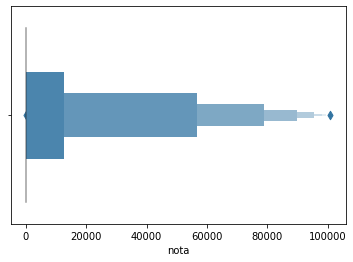

In [0]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
id       2
ar       2
ro       2
ta       2
cs       2
el       1
tr       1
hu       1
te       1
nb       1
sl       1
af       1
is       1
ky       1
xx       1
vi       1
no       1
ps       1
pl       1
Name: original_language, dtype: int64

In [0]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [0]:
lang =tmdb.original_language.value_counts().to_frame().reset_index()
lang.colunms = ['original_language','total']
lang.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


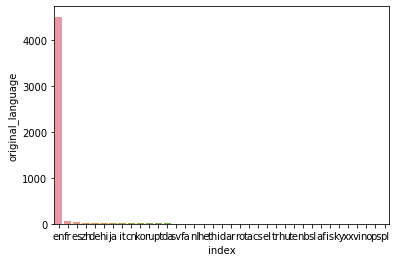

In [0]:
sns.barplot(y='original_language',x='index',data = lang)

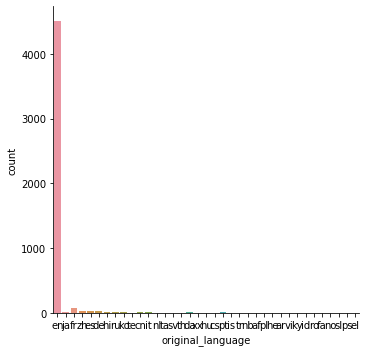

In [0]:
sns.catplot(x='original_language', kind = 'count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7efd6eee9208>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

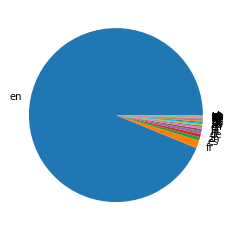

In [0]:
plt.pie(lang.original_language, labels = lang['index'])

In [0]:
total_lang = tmdb.original_language.value_counts()
total = total_lang.sum()
total_en = total_lang.loc['en']
total_res = total - total_en
print(total_en,total_res)

4505 298


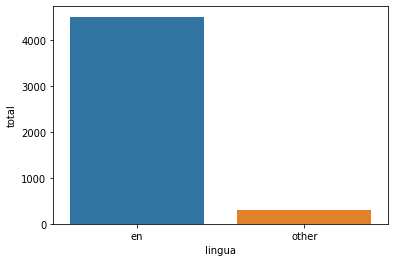

In [0]:
dados = {
    'lingua' : ['en', 'other'],
    'total' : [total_en, total_res]
}
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data= dados)

([<matplotlib.patches.Wedge at 0x7efd6ee01f98>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0791697511565306, -0.2130555049482467, 'other')])

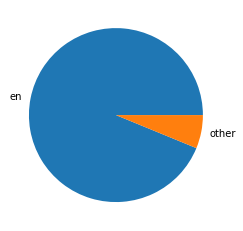

In [0]:
plt.pie(dados.total, labels = dados.lingua)

In [0]:
total_not_en_lang = tmdb.query('original_language != "en"').original_language.value_counts().reset_index()
total_not_en_lang.columns = ['original_language','total']
total_not_en_lang

,original_language,total
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19
5,ja,16
6,it,14
7,cn,12
8,ko,11
9,ru,11


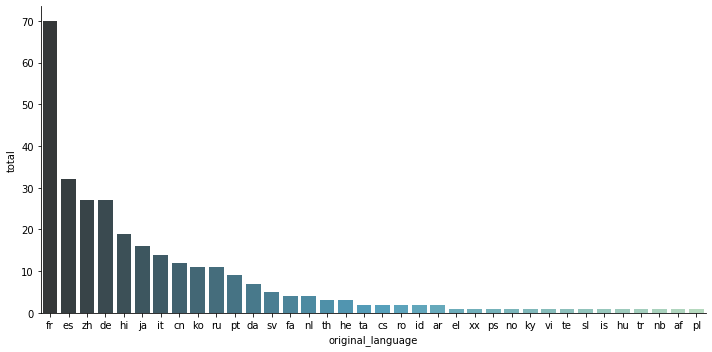

In [0]:
sns.catplot(x= "original_language",y = 'total',  data = total_not_en_lang, aspect = 2, kind = "bar",palette= 'GnBu_d')

In [0]:
filmes.head(2)

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [0]:
notas.head()

,user_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas_toystory = notas.query('filme_id == 1')
notas_jumanji = notas.query('filme_id == 2')
print(len(notas_jumanji),len(notas_toystory))

110 215


In [0]:
filme1 = np.append(np.array([2.5]*10),np.array([3.5]*10))
filme2 = np.append(np.array([5]*10),np.array([1]*10))

In [89]:
print('média:   ',filme1.mean(),filme2.mean())
print('mediana: ',np.median(filme1),np.median(filme2))
print('desvio:  ',np.std(filme1),np.std(filme2))

média:    3.0 3.0
mediana:  3.0 3.0
desvio:   0.5 2.0


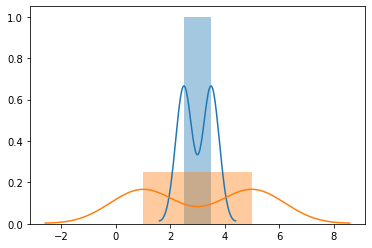

In [59]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

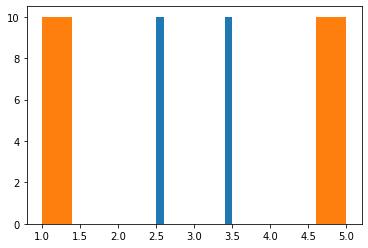

In [60]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4e2d271668>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4e2d2886d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4e2d2940f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4e2d288d68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4e2d288048>,
  <matplotlib.lines.Line2D at 0x7f4e2d288390>]}

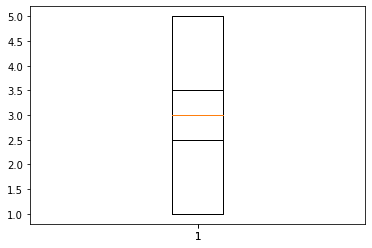

In [64]:
plt.boxplot(filme1)
plt.boxplot(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4e2d143d30>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4e2d159d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4e2d0e7780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4e2d0e7438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4e2d1596d8>,
  <matplotlib.lines.Line2D at 0x7f4e2d159a20>]}

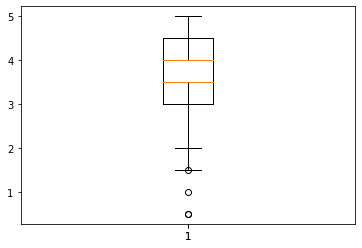

In [68]:
plt.boxplot(notas_toystory.nota)
plt.boxplot(notas_jumanji.nota,)

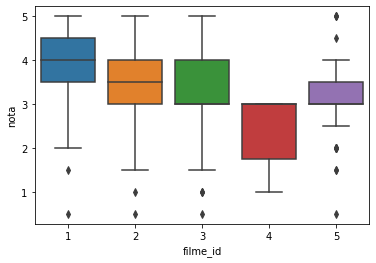

In [75]:
sns.boxplot(x='filme_id',y='nota',data = notas.query('filme_id in [1,2,3,4,5]'))

In [78]:
notas_jumanji.nota.std(),notas_toystory.nota.std()

(0.8817134921476455, 0.8348591407114045)